In [112]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Model yang digunakan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluasi Model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Businsess Understanding

Sebuah supermarket ingin mengidentifikasi kota mana saja yang dapat menjual banyak produk yang dimiliki. Dengan demikian dapat membantu supermarket dalam menentukan jumlah produk yang akan di restock di kota tersebut dan menentukan product mana yang dapat di berikan discount di setiap kotanya.

# Data Understanding

In [113]:
#import Data
df = pd.read_csv("/content/drive/MyDrive/Dataset/supermarket_sales_Tugas Akhir FGA.csv")

df = pd.DataFrame(df)

df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [114]:
#melihat ukuran data
df.shape

(1000, 17)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [117]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [118]:
#menghutung jumlah setiap customer type
df['Customer type'].value_counts()

,count
Customer type,
Member,501
Normal,499


In [119]:
#menghutung jumlah setiap branch
df['Branch'].value_counts()

,count
Branch,
A,340
B,332
C,328


In [120]:
#menghutung jumlah setiap City
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [121]:
#menghutung jumlah setiap product line
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [122]:
#menghitung jumlah setiap payment
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


#Data Preparation

In [123]:
#mengecek missing value
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [124]:
df.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


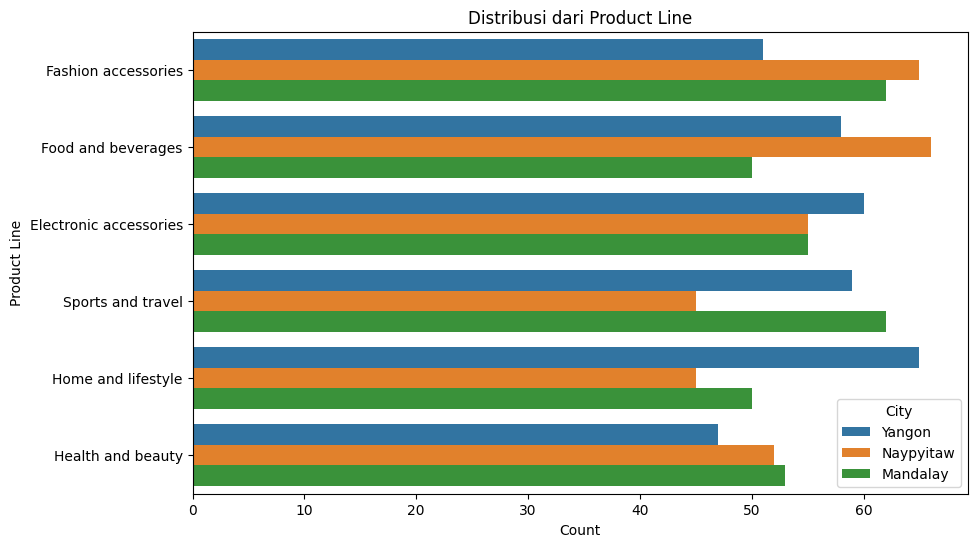

In [125]:
# visualisasi distribusi dari product line berdasarkan city
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Product line', order=df['Product line'].value_counts().index, hue='City')
plt.title("Distribusi dari Product Line")
plt.xlabel("Count")
plt.ylabel("Product Line")
plt.show()

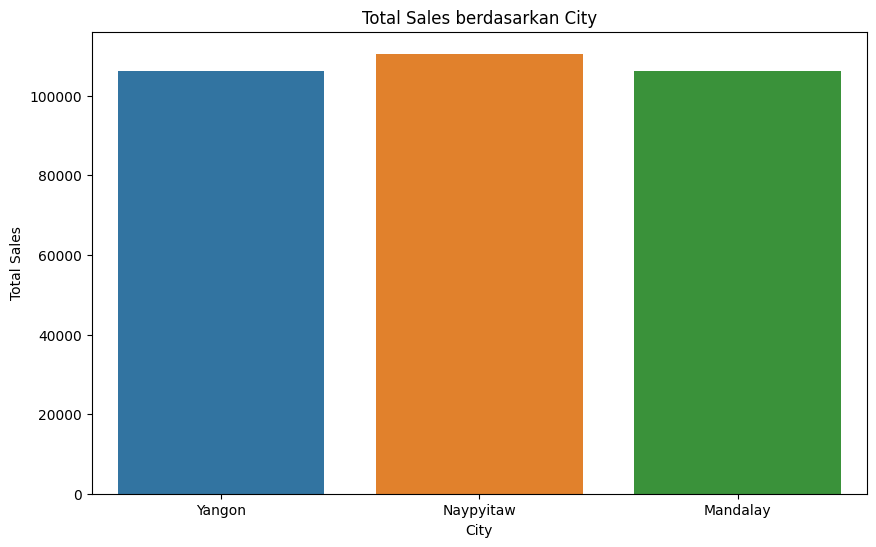

In [126]:
# Visualisasi total sales berdasarkan City
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='City', y='Total', estimator=sum, ci=None, hue="City")
plt.title("Total Sales berdasarkan City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

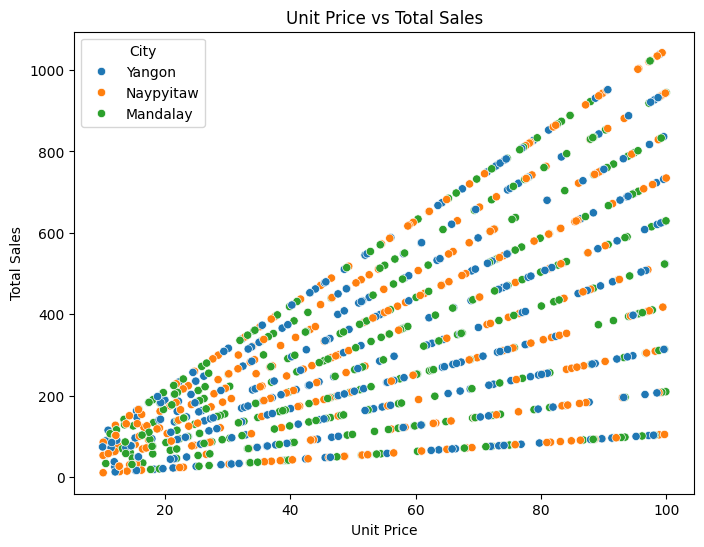

In [127]:
# Visualisasi relasi antara unit price dan total berdasarkan city
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Unit price', y='Total', hue="City")
plt.title("Unit Price vs Total Sales")
plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.show()

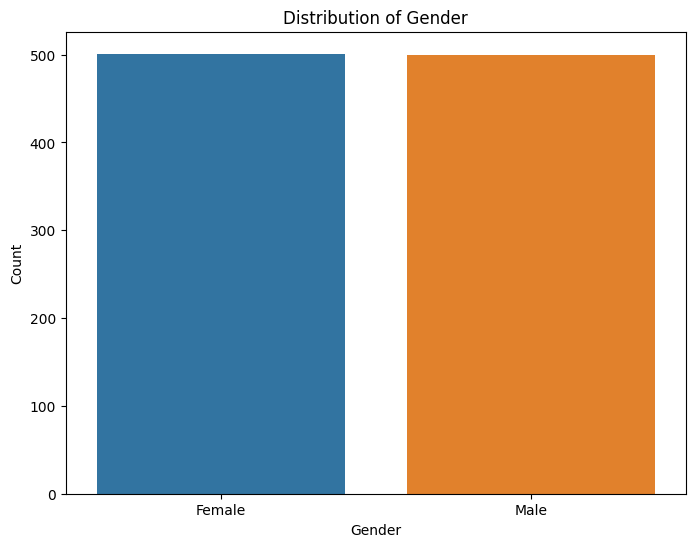

In [128]:
# Visualisasi distribusi gender dari customer
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue="Gender")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

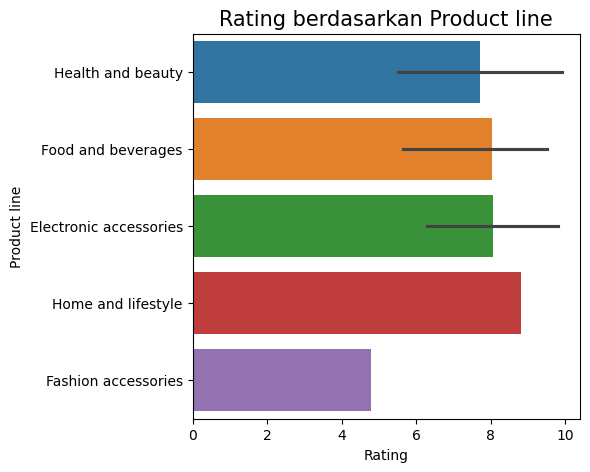

In [129]:
#visualisasi rating berdasarkan product line
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Product line", data=df[170:180], hue="Product line")
plt.title("Rating berdasarkan Product line",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Product line")
plt.show()

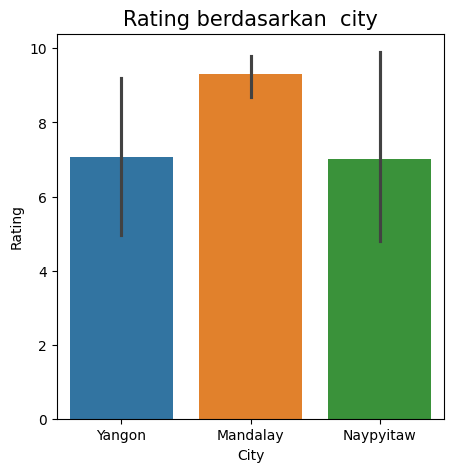

In [130]:
#visualisasi rating berdasarkan city
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="City", y="Rating", data=df[170:180], hue="City")
plt.title("Rating berdasarkan  city",fontsize=15)
plt.xlabel("City")
plt.ylabel("Rating")
plt.show()

In [131]:
#membuat list untuk encode data
list_1=list(df.columns)

list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

le=LabelEncoder()

In [132]:
#Encode Data
for i in list_cate:
    df[i]=le.fit_transform(df[i])

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [133]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Q5Ano3_OUSlKLXffnVWkKpeY1BhtXoUo7ZY98qQbtZY#gid=0


##Hasil Encoded:

Branch:
  - 0 = A
  - 1 = B
  - 2 = C

City
  - 0 = Yangon
  - 1 = Naypyitaw
  - 2 = Mandalay

Customer Type
  - 0 = Member
  - 1 = Normal
  
Gender
  - 0 = Female
  - 1 = Male

Product Line
  - 0 = Electronic accessories
  - 1 = Fashion accessories
  - 2 = Food and beverages
  - 3 = Health and beauty
  - 4 = Home and lifestyle
  - 5 = Sports and travel

Payment
  - 0 = Cash
  - 1 = Credit Card
  - 2 = Ewalet
  

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   int64  
 1   Branch                   1000 non-null   int64  
 2   City                     1000 non-null   int64  
 3   Customer type            1000 non-null   int64  
 4   Gender                   1000 non-null   int64  
 5   Product line             1000 non-null   int64  
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   int64  
 11  Time                     1000 non-null   int64  
 12  Payment                  1000 non-null   int64  
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [135]:
#Correlation setiap data
df.corr()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,1.000000,-0.041753,0.031247,0.070519,0.023552,0.027589,-0.009213,0.024977,0.027277,0.027277,-0.025614,0.009224,0.021478,0.027277,NaN,0.027277,-0.003787
Branch,-0.041753,1.000000,-0.507401,-0.019608,-0.056318,-0.053938,0.028202,0.015964,0.041047,0.041047,-0.025768,0.035921,-0.050104,0.041047,NaN,0.041047,0.010238
City,0.031247,-0.507401,1.000000,0.004899,0.012219,0.008811,-0.013763,-0.002121,-0.012812,-0.012812,0.002043,-0.066115,0.019094,-0.012812,NaN,-0.012812,0.049585
Customer type,0.070519,-0.019608,0.004899,1.000000,0.039996,-0.036800,-0.020238,-0.016763,-0.019670,-0.019670,-0.000419,-0.020162,0.018073,-0.019670,NaN,-0.019670,0.018889
Gender,0.023552,-0.056318,0.012219,0.039996,1.000000,0.005193,0.015445,-0.074258,-0.049451,-0.049451,0.021450,0.085054,0.044578,-0.049451,NaN,-0.049451,0.004800
Product line,0.027589,-0.053938,0.008811,-0.036800,0.005193,1.000000,0.019321,0.020256,0.031621,0.031621,-0.032970,-0.058607,0.029896,0.031621,NaN,0.031621,-0.020529
Unit price,-0.009213,0.028202,-0.013763,-0.020238,0.015445,0.019321,1.000000,0.010778,0.633962,0.633962,-0.033470,0.008155,-0.015941,0.633962,NaN,0.633962,-0.008778
Quantity,0.024977,0.015964,-0.002121,-0.016763,-0.074258,0.020256,0.010778,1.000000,0.705510,0.705510,-0.013842,-0.009045,-0.003921,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.027277,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,1.000000,-0.025537,-0.005298,-0.012434,1.000000,NaN,1.000000,-0.036442
Total,0.027277,0.041047,-0.012812,-0.019670,-0.049451,0.031621,0.633962,0.705510,1.000000,1.000000,-0.025537,-0.005298,-0.012434,1.000000,NaN,1.000000,-0.036442


<Axes: >

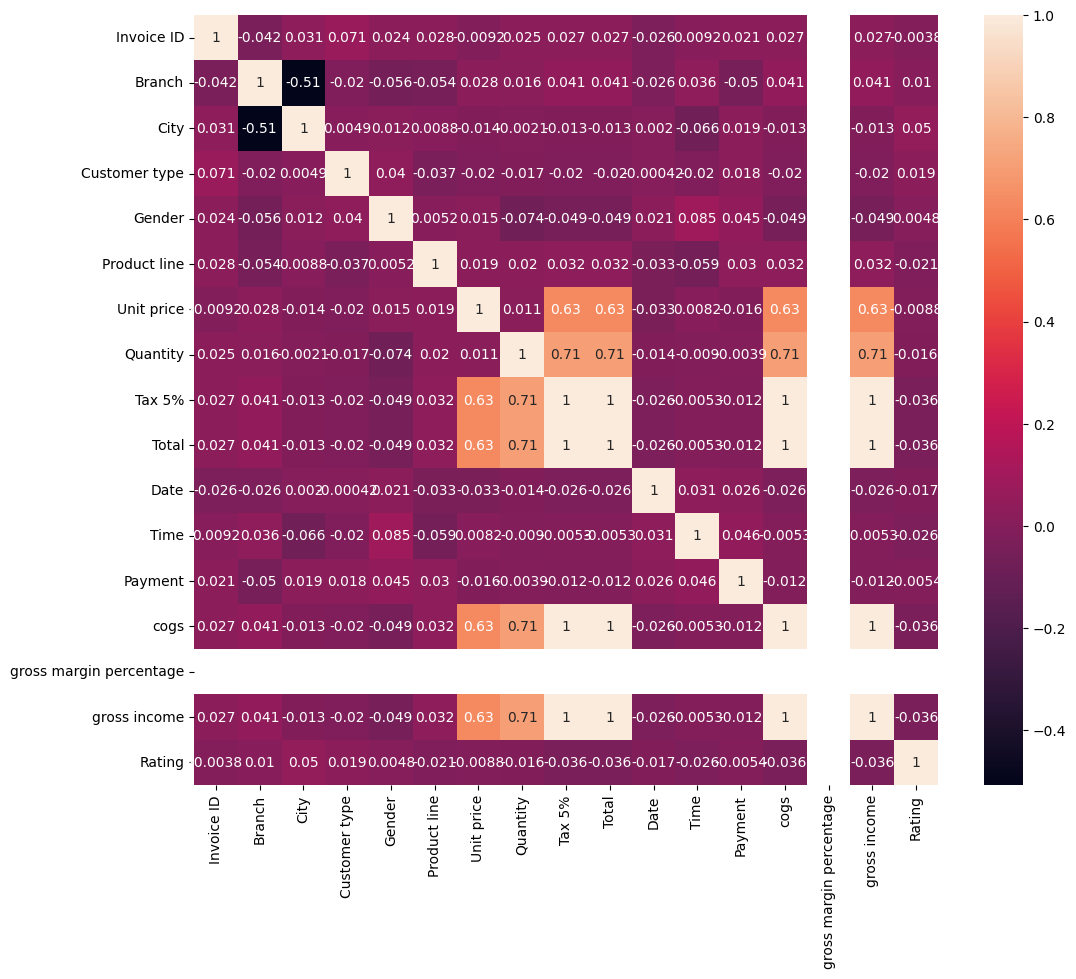

In [136]:

plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

#Data Modeling

In [137]:
#Target Variabel
y=df['City'].astype('category')
#Input Variabel
x=df.drop('City',axis=1)

In [138]:
# Split testing & training
# Data testing 30%, Data training 70%

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

Modeling KNN

In [139]:
#Membuat object dan memodelkan data menggunakan Algoritma KNN
knn=KNeighborsClassifier(n_neighbors=7)
modelknn = knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

In [140]:
#Evaluasi Model KNN
y_pred=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.36      0.47      0.41        97
           1       0.29      0.26      0.28       107
           2       0.28      0.22      0.24        96

    accuracy                           0.32       300
   macro avg       0.31      0.32      0.31       300
weighted avg       0.31      0.32      0.31       300

Training Score:
 55.285714285714285


Text(113.9222222222222, 0.5, 'Predicted Values')

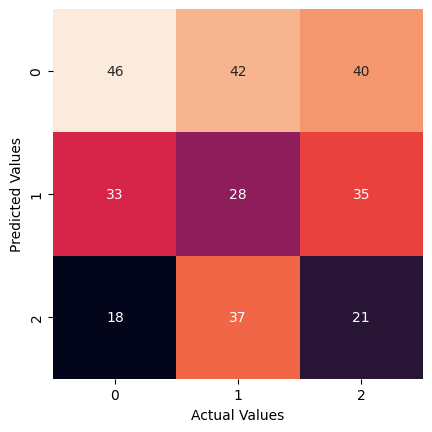

In [142]:
# visualisasi confusion matrix model KNN
mat = confusion_matrix (y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Model Decision Tree

In [143]:
#Membuat object dan memodelkan data menggunakan Algoritma Decision Tree
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
modeldtree = dtree.fit(x_train,y_train)
preddtree = modeldtree.predict(x_test)

In [144]:
#Evaluasi Model Decision Tree
y_pred=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        96

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training Score:
 100.0


Text(113.9222222222222, 0.5, 'Predicted Values')

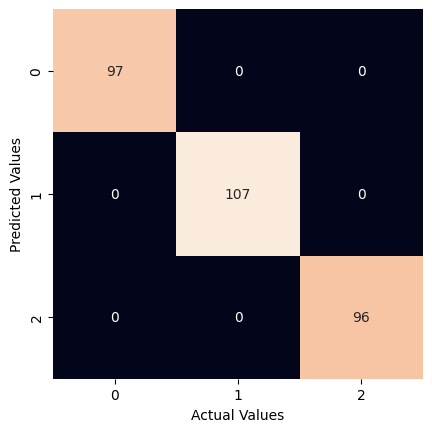

In [145]:
# visualisasi confusion matrix model Decision Tree
mat = confusion_matrix (y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Model Random Forest

In [147]:
#Membuat object dan memodelkan data menggunakan Algoritma Random Forest
rf=RandomForestClassifier()
modelrf = rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [148]:
#Evaluasi Model Random Forest
y_pred=rf.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Training Score:\n",rf.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        96

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training Score:
 100.0


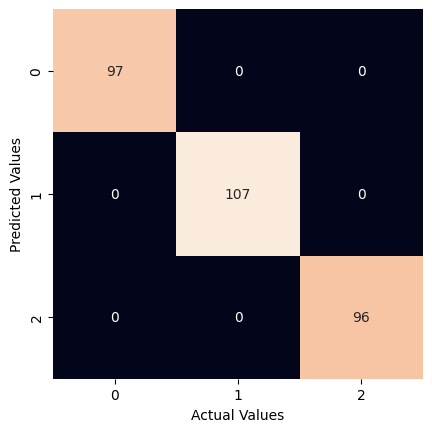

In [149]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

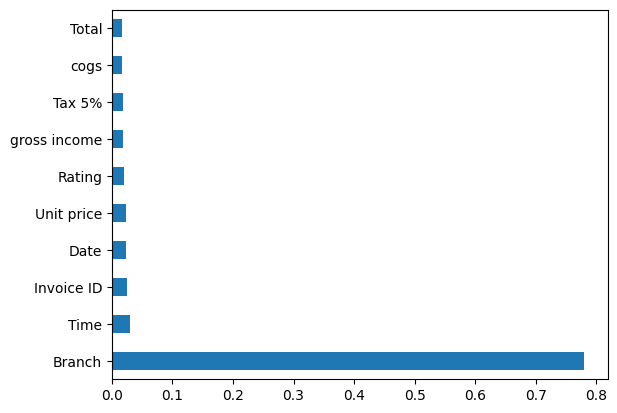

In [150]:
# Signifikan factor dari model Random Forest
feat_importances=pd.Series(modelrf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind="barh")

plt.show()

Model GBOOST

In [151]:
#Membuat object dan memodelkan data menggunakan Algoritma GBOOST
gb=GradientBoostingClassifier()
modelgb = gb.fit(x_train,y_train)
predgb = modelgb.predict(x_test)

In [152]:
#Evaluasi Model GBOOST
y_pred=gb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00        96

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Confusion Matrix:
 [[ 97   0   0]
 [  0 107   0]
 [  0   0  96]]
Training Score:
 100.0


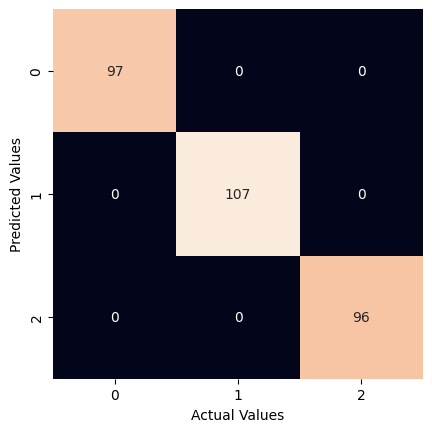

In [153]:
# Visualize the confusion matrix of GBOOST
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

#Evaluation Data Modeling

Berdasarkan hasil modeling dari 4 Algoritma yang digunakan. model terbaik dengan tingkat akurasinya tertinggi diperoleh oleh algoritma Decision Tree, Random Forest, dan GBOOST dengan nilai training scorenya 100. Akan tetapi kali ini saya hanya mencoba satu model untuk di evaluasi yaitu menggunakan Algoritma Random Forest

In [154]:
#import data yang ingin di prediksi
datates = pd.read_csv("/content/drive/MyDrive/Dataset/New_supermarket_sales_Tugas Akhir FGA .csv")

df1 = pd.DataFrame(datates)

df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,210-57-1719,B,Mandalay,Normal,Female,Health and beauty,58.24,9,26.2080,550.3680,2/5/2019,12:34,Cash,524.16,4.761905,26.2080,9.7
1,635-40-6220,A,Yangon,Normal,Male,Health and beauty,89.60,8,35.8400,752.6400,2/7/2019,11:28,Ewallet,716.80,4.761905,35.8400,6.6
2,324-92-3863,A,Yangon,Member,Male,Electronic accessories,20.89,2,2.0890,43.8690,2/5/2019,18:45,Cash,41.78,4.761905,2.0890,9.8
3,480-63-2856,C,Naypyitaw,Normal,Male,Food and beverages,19.25,8,7.7000,161.7000,1/23/2019,18:37,Ewallet,154.00,4.761905,7.7000,6.6
4,575-67-1508,A,Yangon,Normal,Male,Electronic accessories,38.60,1,1.9300,40.5300,1/29/2019,11:26,Ewallet,38.60,4.761905,1.9300,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2/8/2019,15:31,Cash,33.52,4.761905,1.6760,6.7
296,525-88-7307,B,Mandalay,Member,Male,Sports and travel,75.82,1,3.7910,79.6110,1/31/2019,13:19,Cash,75.82,4.761905,3.7910,5.8
297,427-45-9297,B,Mandalay,Member,Female,Home and lifestyle,40.73,7,14.2555,299.3655,3/12/2019,11:01,Ewallet,285.11,4.761905,14.2555,5.4
298,835-16-0096,C,Naypyitaw,Member,Male,Sports and travel,14.70,5,3.6750,77.1750,3/24/2019,13:48,Ewallet,73.50,4.761905,3.6750,8.5


In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               300 non-null    object 
 1   Branch                   300 non-null    object 
 2   City                     300 non-null    object 
 3   Customer type            300 non-null    object 
 4   Gender                   300 non-null    object 
 5   Product line             300 non-null    object 
 6   Unit price               300 non-null    float64
 7   Quantity                 300 non-null    int64  
 8   Tax 5%                   300 non-null    float64
 9   Total                    300 non-null    float64
 10  Date                     300 non-null    object 
 11  Time                     300 non-null    object 
 12  Payment                  300 non-null    object 
 13  cogs                     300 non-null    float64
 14  gross margin percentage  3

In [156]:
# Encoded Data
le_InvoiceID = LabelEncoder()
le_Branch = LabelEncoder()
le_Customer = LabelEncoder()
le_Gender = LabelEncoder()
le_Product = LabelEncoder()
le_Payment = LabelEncoder()
le_Date = LabelEncoder()
le_Time = LabelEncoder()
le_City = LabelEncoder()

df1['Invoice ID'] = le_InvoiceID.fit_transform(df1['Invoice ID'])
df1['Branch'] = le_Branch.fit_transform(df1['Branch'])
df1['Customer type'] = le_Customer.fit_transform(df1['Customer type'])
df1['Product line'] = le_Product.fit_transform(df1['Product line'])
df1['Payment'] = le_Payment.fit_transform(df1['Payment'])
df1['Gender'] = le_Gender.fit_transform(df1['Gender'])
df1['Date'] = le_Date.fit_transform(df1['Date'])
df1['Time'] = le_Time.fit_transform(df1['Time'])
df1['City'] = le_City.fit_transform(df1['City'])

df1

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,31,1,0,1,0,3,58.24,9,26.2080,550.3680,50,61,0,524.16,4.761905,26.2080,9.7
1,187,0,2,1,1,3,89.60,8,35.8400,752.6400,52,34,2,716.80,4.761905,35.8400,6.6
2,81,0,2,0,1,0,20.89,2,2.0890,43.8690,50,197,0,41.78,4.761905,2.0890,9.8
3,134,2,1,1,1,2,19.25,8,7.7000,161.7000,14,196,2,154.00,4.761905,7.7000,6.6
4,161,0,2,1,1,0,38.60,1,1.9300,40.5300,20,32,2,38.60,4.761905,1.9300,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,194,1,0,1,1,1,33.52,1,1.6760,35.1960,53,134,0,33.52,4.761905,1.6760,6.7
296,140,1,0,0,1,5,75.82,1,3.7910,79.6110,22,78,0,75.82,4.761905,3.7910,5.8
297,117,1,0,0,0,4,40.73,7,14.2555,299.3655,58,23,2,285.11,4.761905,14.2555,5.4
298,273,2,1,0,1,5,14.70,5,3.6750,77.1750,70,92,2,73.50,4.761905,3.6750,8.5


# Deployment


In [157]:
#input variabel
x2 =df1[["Invoice ID","Branch","Customer type","Gender","Product line",
         "Unit price","Quantity","Tax 5%","Total","Date","Time","Payment",
         "cogs","gross margin percentage","gross income","Rating"]]


In [158]:
#prediksi menggunakan model random forest
predrf2 = rf.predict(x2)
predrf2

array([0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0,
       2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 1])

In [159]:
# Membuat objek baru untuk preparing export hasil pemodelan data menggunakan data baru
dfpred = pd.DataFrame({"Predict City": predrf2})

dfpred.head()

,Predict City
0,0
1,2
2,2
3,1
4,2


In [160]:
# sort=True, membalikan ke indexnya masing
dfHasilPred = pd.concat([ df1, dfpred], sort=True, axis=1)
dfHasilPred

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Predict City
0,31,1,0,1,0,3,58.24,9,26.2080,550.3680,50,61,0,524.16,4.761905,26.2080,9.7,0
1,187,0,2,1,1,3,89.60,8,35.8400,752.6400,52,34,2,716.80,4.761905,35.8400,6.6,2
2,81,0,2,0,1,0,20.89,2,2.0890,43.8690,50,197,0,41.78,4.761905,2.0890,9.8,2
3,134,2,1,1,1,2,19.25,8,7.7000,161.7000,14,196,2,154.00,4.761905,7.7000,6.6,1
4,161,0,2,1,1,0,38.60,1,1.9300,40.5300,20,32,2,38.60,4.761905,1.9300,6.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,194,1,0,1,1,1,33.52,1,1.6760,35.1960,53,134,0,33.52,4.761905,1.6760,6.7,0
296,140,1,0,0,1,5,75.82,1,3.7910,79.6110,22,78,0,75.82,4.761905,3.7910,5.8,0
297,117,1,0,0,0,4,40.73,7,14.2555,299.3655,58,23,2,285.11,4.761905,14.2555,5.4,0
298,273,2,1,0,1,5,14.70,5,3.6750,77.1750,70,92,2,73.50,4.761905,3.6750,8.5,1


In [161]:
#menghityng jumlah hasil prediksi setiap kotanya
dfHasilPred["City"].value_counts()

,count
City,
0,106
2,100
1,94


In [162]:
#Decoding Data
dfHasilPred['Invoice ID'] = le_InvoiceID.inverse_transform(df1['Invoice ID'])
dfHasilPred['Branch'] = le_Branch.inverse_transform(df1['Branch'])
dfHasilPred['Customer type'] = le_Customer.inverse_transform(df1['Customer type'])
dfHasilPred['Product line'] = le_Product.inverse_transform(df1['Product line'])
dfHasilPred['Date'] = le_Date.inverse_transform(df1['Date'])
dfHasilPred['Time'] = le_Time.inverse_transform(df1['Time'])
dfHasilPred['Payment'] = le_Payment.inverse_transform(df1['Payment'])
dfHasilPred['Gender'] = le_Gender.inverse_transform(df1['Gender'])
dfHasilPred['City'] = le_City.inverse_transform(df1['City'])
dfHasilPred['Predict City'] = le_City.inverse_transform(df1['City'])

dfHasilPred

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Predict City
0,210-57-1719,B,Mandalay,Normal,Female,Health and beauty,58.24,9,26.2080,550.3680,2/5/2019,12:34,Cash,524.16,4.761905,26.2080,9.7,Mandalay
1,635-40-6220,A,Yangon,Normal,Male,Health and beauty,89.60,8,35.8400,752.6400,2/7/2019,11:28,Ewallet,716.80,4.761905,35.8400,6.6,Yangon
2,324-92-3863,A,Yangon,Member,Male,Electronic accessories,20.89,2,2.0890,43.8690,2/5/2019,18:45,Cash,41.78,4.761905,2.0890,9.8,Yangon
3,480-63-2856,C,Naypyitaw,Normal,Male,Food and beverages,19.25,8,7.7000,161.7000,1/23/2019,18:37,Ewallet,154.00,4.761905,7.7000,6.6,Naypyitaw
4,575-67-1508,A,Yangon,Normal,Male,Electronic accessories,38.60,1,1.9300,40.5300,1/29/2019,11:26,Ewallet,38.60,4.761905,1.9300,6.7,Yangon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2/8/2019,15:31,Cash,33.52,4.761905,1.6760,6.7,Mandalay
296,525-88-7307,B,Mandalay,Member,Male,Sports and travel,75.82,1,3.7910,79.6110,1/31/2019,13:19,Cash,75.82,4.761905,3.7910,5.8,Mandalay
297,427-45-9297,B,Mandalay,Member,Female,Home and lifestyle,40.73,7,14.2555,299.3655,3/12/2019,11:01,Ewallet,285.11,4.761905,14.2555,5.4,Mandalay
298,835-16-0096,C,Naypyitaw,Member,Male,Sports and travel,14.70,5,3.6750,77.1750,3/24/2019,13:48,Ewallet,73.50,4.761905,3.6750,8.5,Naypyitaw


In [163]:
# Eksport to CSV
#Eksport as download if in colab
from google.colab import files

# Menyimpan file/eksport file to locak computer output csv file
dfHasilPred.to_excel('HasilPredSupermarket.xlsx')
files.download('HasilPredSupermarket.xlsx')

# Convert ke excel
#dfHasilPred.to_excel('HasilPredSupermarket.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>